In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

## Remove Dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:            
            print('Issue with image {}'.format(image_path))

## Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [42]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 143 files belonging to 2 classes.


In [25]:
#images represented as numpy array
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

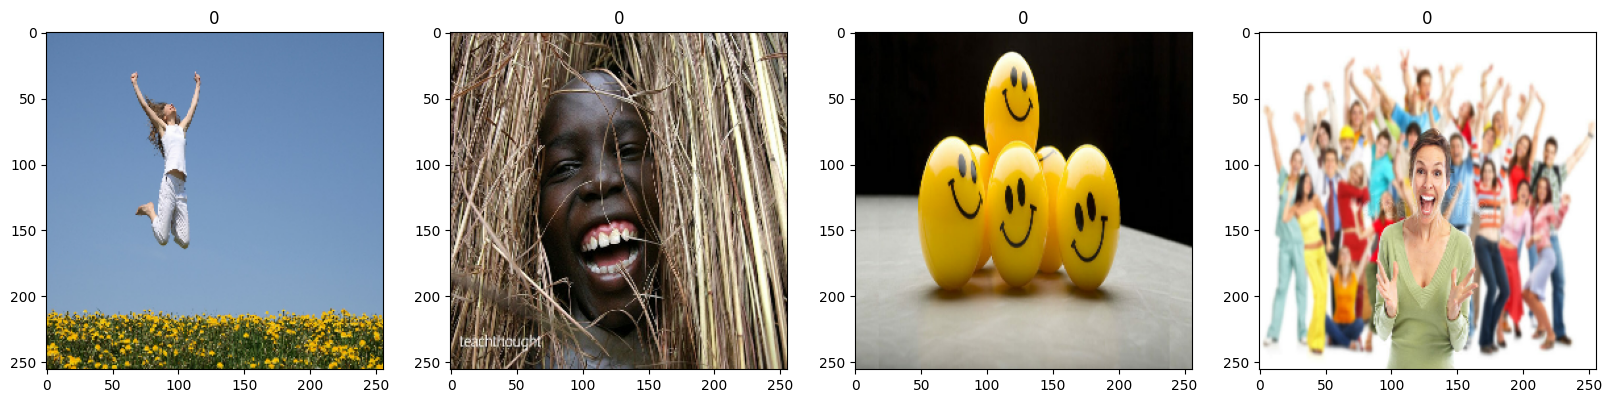

In [27]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

In [43]:
#scaling image to 0-1 range
data = data.map(lambda x, y: (x/255,y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [45]:
batch = scaled_iterator.next()

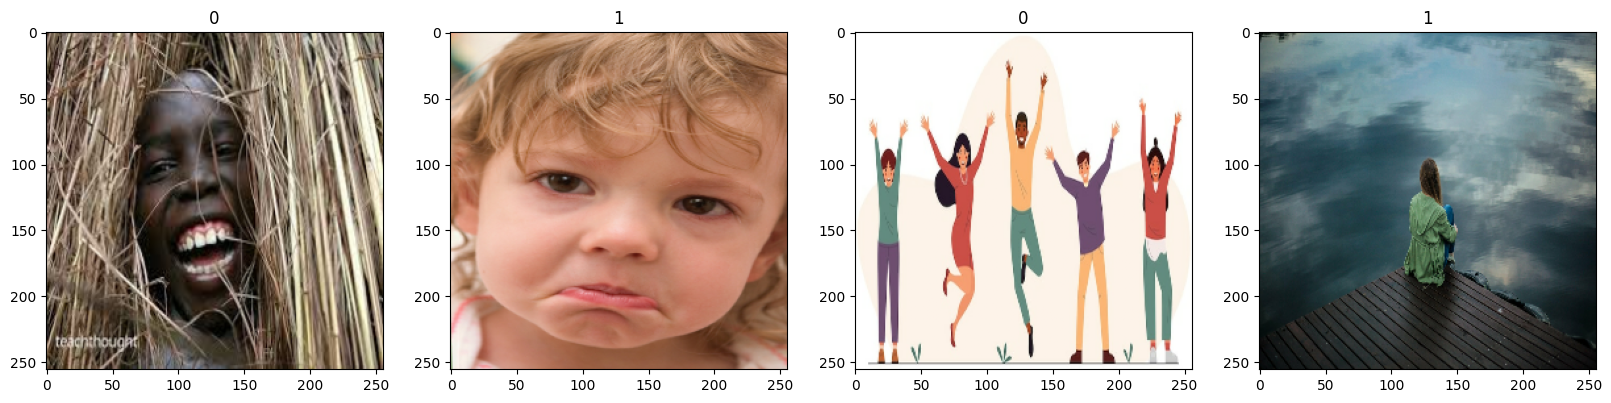

In [46]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [47]:
len(data)

5

In [48]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)
print(train_size)
print(val_size)
print(test_size)

3
1
1


In [49]:
#using keras take & skip methods to split dataset
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [50]:
len(test)

1

## Building Deep Learning Model

In [57]:
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2d, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [58]:
model = Sequential()

In [59]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [61]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

## Training

In [ ]:
logdir='logs'

In [64]:
tesorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tesorboard_callback])

Epoch 1/20
3/3 [==============================] - 14s 994ms/step - loss: 0.6624 - accuracy: 0.6667 - val_loss: 0.8420 - val_accuracy: 0.2812
Epoch 2/20
3/3 [==============================] - 2s 680ms/step - loss: 0.6800 - accuracy: 0.5521 - val_loss: 0.5070 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 3s 710ms/step - loss: 0.5027 - accuracy: 0.7188 - val_loss: 0.5443 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 3s 719ms/step - loss: 0.4626 - accuracy: 0.7396 - val_loss: 0.4600 - val_accuracy: 0.7812
Epoch 5/20
3/3 [==============================] - 3s 703ms/step - loss: 0.3890 - accuracy: 0.8021 - val_loss: 0.4153 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 2s 693ms/step - loss: 0.4648 - accuracy: 0.7708 - val_loss: 0.3836 - val_accuracy: 0.8125
Epoch 7/20
3/3 [==============================] - 3s 731ms/step - loss: 0.3001 - accuracy: 0.8438 - val_loss: 0.3412 - val_accuracy: 0.8125
Epoch 8/20
3/3 [===

In [68]:
hist.history

{'loss': [0.6624420285224915,
  0.6799554824829102,
  0.5026981234550476,
  0.4626424312591553,
  0.3889673948287964,
  0.4648149013519287,
  0.3001147508621216,
  0.268634557723999,
  0.218454048037529,
  0.19008727371692657,
  0.15922954678535461,
  0.08730915933847427,
  0.10183227807283401,
  0.07554598152637482,
  0.06203601881861687,
  0.03530489280819893,
  0.03421540558338165,
  0.021753646433353424,
  0.020484881475567818,
  0.018550269305706024],
 'accuracy': [0.6666666865348816,
  0.5520833134651184,
  0.71875,
  0.7395833134651184,
  0.8020833134651184,
  0.7708333134651184,
  0.84375,
  0.8854166865348816,
  0.9583333134651184,
  0.90625,
  0.9479166865348816,
  0.9895833134651184,
  0.9479166865348816,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.8419545888900757,
  0.5070168972015381,
  0.5443344712257385,
  0.45998311042785645,
  0.4153350591659546,
  0.38355177640914917,
  0.341150164604187,
  0.22547435760498047,
  0.12303315103054047,
  0.055

## Plot Performance

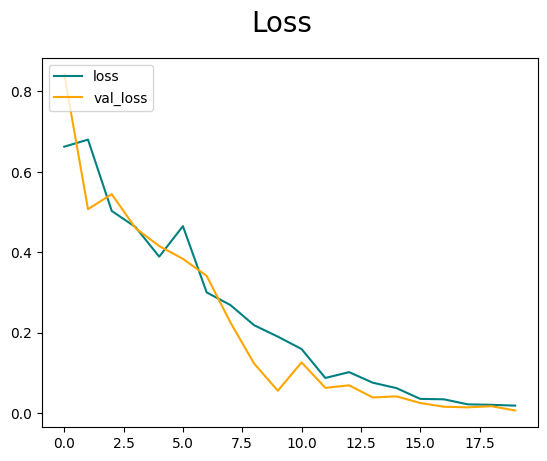

In [70]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

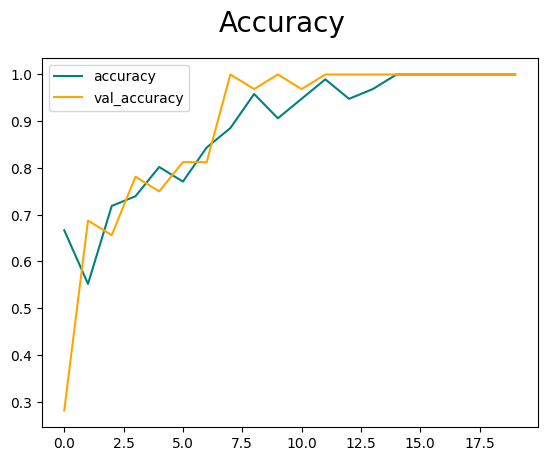

In [71]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate Performance

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [74]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [76]:
print(f'Precision{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision1.0, Recall:1.0,Accuracy:1.0


## Test

In [77]:
import cv2

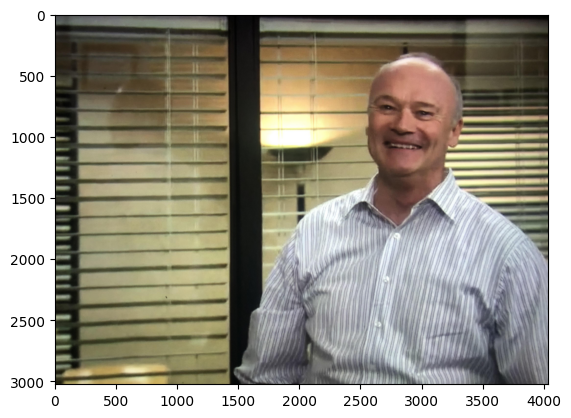

In [91]:
img = cv2.imread('happycreed.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

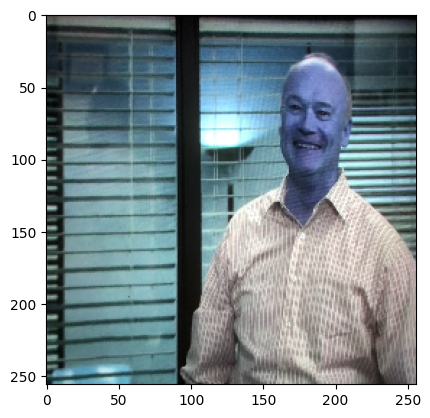

In [92]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [94]:
yhat

array([[0.10204717]], dtype=float32)

## Save the model

In [88]:
from tensorflow.keras.models import load_model

In [89]:
model.save(os.path.join('models','happysadmodel.h5'))

In [90]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [95]:
new_model.predict(np.expand_dims(resize/255,0))

array([[0.10204717]], dtype=float32)